# Image Filtering

Image filtering is a fundamental concept in computer vision and image processing. It involves applying a filter (also known as a kernel) to an image in order to perform operations such as blurring, sharpening, edge detection, and more. The OpenCV library (cv2) in Python is a powerful tool for image processing, including image filtering.

## Smoothing Images

Image smoothing, also known as blurring, is a widely used image processing technique. It's employed to decrease noise, suppress fine details, or ready an image for subsequent analysis. To continue with the following steps, we'll use the following reference image and its noisy variant.

In [1]:
from sklearn.datasets import load_sample_image, load_sample_images
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

Images = load_sample_images()
Names = [x.split("\\")[-1].replace('.jpg','').title() for x in Images['filenames']]
Images = Images['images']

plt.rcParams.update({'font.family' : 'Calibri', 'axes.titlesize' : 16})  # Set font properties for plots

# Define a function to display images with titles and optional settings
def ImShow(Images, Names, title='Images', grayscale=False):
    # Create a figure with two subplots
    fig, ax = plt.subplots(1, 2, figsize=(11, 5))  # Create a figure with 1 row and 2 columns of subplots
    ax = ax.ravel()  # Flatten the subplots for easier manipulation

    # Iterate over the first two images
    for i in range(2):
        if grayscale:
            _ = ax[i].imshow(Images[i], 'gray')  # Display the image in grayscale
        else:
            _ = ax[i].imshow(Images[i])  # Display the image in color
        _ = ax[i].set_aspect(1)  # Set aspect ratio to 1 (square aspect)
        _ = ax[i].axis('off')  # Turn off axis
        _ = ax[i].set_title(Names[i], weight='bold')  # Set image title with bold font

    if title:
        _ = fig.suptitle(title, weight='bold', fontsize=18)  # Set main title if provided
    
    plt.tight_layout()  # Adjust layout for better spacing

    return fig, ax

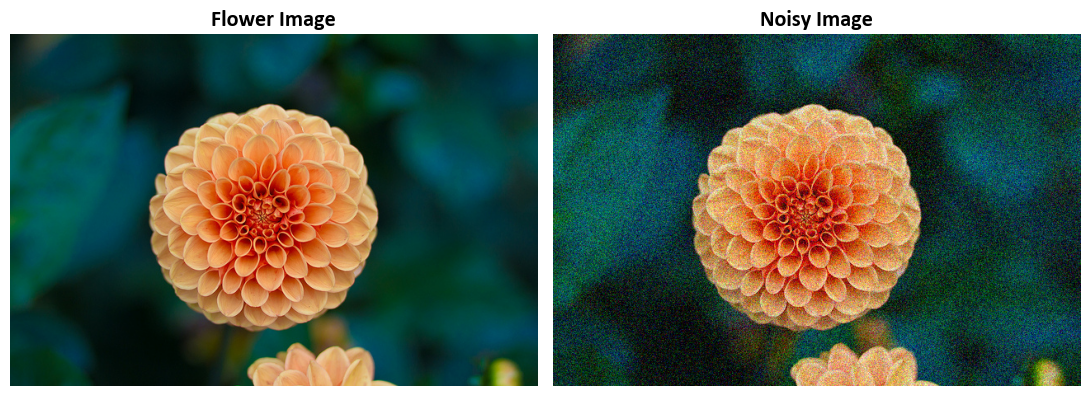

In [2]:
# Make a copy of the second image in the 'Images' array
Img = Images[1].copy()

# Define a function that standardizes image values
def ImgStd(Inp):
    '''This function standardizes image values.'''
    Out = np.round(Inp).astype(int)  # Round the input values and convert to integers
    Out[Out < 0] = 0  # Set any negative values to 0
    Out[Out > 255] = 255  # Set any values above 255 to 255 (maximum pixel value)
    return Out  # Return the standardized image

# Import necessary libraries
import numpy as np

# Define the parameters for generating a noisy image
mu = 0  # Mean of the noise
sigma = 30  # Standard deviation of the noise

# Create a noisy image by adding Gaussian noise to the copy of the original image
Img_noise = Img.copy() - np.random.normal(mu, sigma, size=Img.shape)

# Standardize the noisy image using the defined ImgStd function
Img_noise = ImgStd(Img_noise)

# Display the original image and the noisy image side by side
_ = ImShow(Images=[Img, Img_noise],
           Names=['Flower Image', 'Noisy Image'],
           title=False)  # Show the images without titles

### 2D Convolution (Image Filtering)

The function applies an arbitrary linear filter to an image. In-place operation is supported. When the aperture is partially outside the image, the function interpolates outlier pixel values according to the specified border mode.

The function does actually compute correlation, not the convolution {cite:p}`opencv_library, OpenCVDocumentation`:

\begin{equation}
\texttt{dst} (x,y) = \sum _{ \substack{0\leq x' < \texttt{kernel.cols}\\{0\leq y' < \texttt{kernel.rows}}}} \texttt{kernel} (x',y')* \texttt{src} (x+x'- \texttt{anchor.x} ,y+y'- \texttt{anchor.y} )
\end{equation} 


That is, the kernel is not mirrored around the anchor point. If you need a real convolution, flip the kernel using flip and set the new anchor to (kernel.cols - anchor.x - 1, kernel.rows - anchor.y - 1).


The Python function `cv2.filter2D()` is a method from the OpenCV (Open Source Computer Vision Library) used for applying a custom convolutional filter to an input image (source) in order to perform image processing operations. Here's a refined explanation of its parameters and return value:

```python
cv2.filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]]) → dst
```

- **src**: This parameter represents the input image, often referred to as the "source" image, on which the filter operation is applied. It's a mandatory argument and should be a multi-channel image (e.g., RGB or grayscale).

- **ddepth**: This specifies the desired depth of the output image (destination). It determines the data type of the destination image, which can be different from the source image. Common data types include `cv2.CV_8U` for 8-bit unsigned integers, `cv2.CV_32F` for 32-bit floating-point numbers, etc.

- **kernel**: The kernel is a user-defined convolution matrix that defines the filter's behavior. This parameter is essential and should be a numerical matrix (numpy array) used for filtering the source image. The kernel defines the weights applied to the image pixels to compute the output.

- **dst** (optional): This is the destination image, which is where the filtered result is stored. If not provided, the function creates a new image to store the result. It should have the same size and type as the source image.

- **anchor** (optional): This parameter denotes the relative position within the kernel. It specifies the anchor point with respect to which the convolution operation is performed. The anchor point determines the alignment of the kernel over the source image.

- **delta** (optional): The value added to the filtered pixels, which can be used for contrast adjustment or to shift the intensity range of the output image.

- **borderType** (optional): This parameter determines the border mode applied when the kernel extends beyond the edges of the source image. Common border types include constant border, replicate border, reflect border, etc.

- **Returns**: The function returns the filtered image, which is the result of applying the specified kernel to the input image. The destination image (dst) contains the filtered output.

<font color='Blue'><b>Example</b></font>:

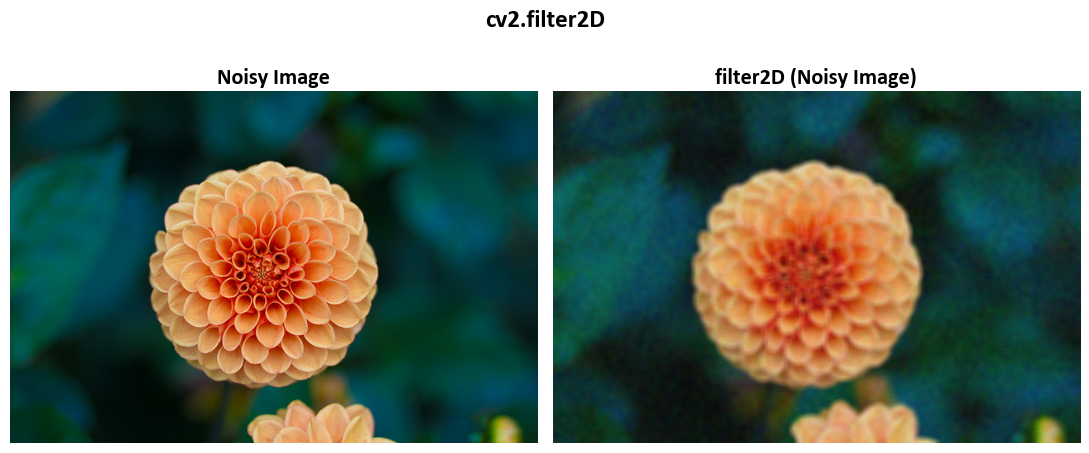

In [3]:
# Import necessary libraries
import numpy as np  # Import NumPy for array operations
import cv2  # Import OpenCV for image processing

# Define a kernel for filtering (8x8 averaging kernel)
kernel = np.ones((8, 8), np.float32) / 64

# Apply the filter2D operation
Out = cv2.filter2D(Img_noise, -1, kernel)
Out = ImgStd(Out)

# Display the original noisy image and the filtered image side by side
_ = ImShow(Images=[Img, Out],
           Names=['Noisy Image', 'filter2D (Noisy Image)'],
           title='cv2.filter2D')

## Image Blurring (Image Smoothing)

Image blurring, also known as image smoothing or image filtering, is a fundamental image processing technique employed to mitigate high-frequency components within an image, such as noise and edges. Its primary purpose is to eliminate undesired details, resulting in a more visually cohesive and smoother appearance. Various blurring methods exist, each serving distinct purposes {cite:p}`opencv_library, OpenCVDocumentation`:

1. **Gaussian Blur**: This technique employs a Gaussian kernel that convolves with the image pixels, producing a weighted average of neighboring pixels. These weights are determined by the Gaussian distribution, making it adept at reducing high-frequency noise while preserving image structure.

2. **Median Blur**: In this approach, every pixel in the image is replaced with the median value of its neighboring pixels. It is particularly effective in removing "salt-and-pepper" noise, where isolated pixels have extreme intensity values, leading to a cleaner image.

3. **Bilateral Filter**: A non-linear filter that considers both spatial and intensity differences during the blurring process. It excels at noise reduction while retaining the sharpness of significant image features and edges.

4. **Box Blur**: Also known as average blur, this method replaces each pixel with the average value of its neighboring pixels. While providing a simple and uniform blurring effect, it may not preserve intricate image details as effectively as other methods.

5. **Motion Blur**: Simulates the effect of camera or object motion, creating streak-like artifacts within the image. This blurring technique imparts a sense of movement and dynamics to the scene.

These diverse blurring methods can be implemented using a range of image processing libraries, such as OpenCV in the Python programming language. The choice of a specific blurring technique hinges on the unique requirements of the application and the intrinsic characteristics of the image content, allowing practitioners to tailor the approach to their specific needs.

### Box Blur (Average Blur)

Box blur, also known as a box linear filter or average blur, constitutes a widespread low-pass filtering technique used to introduce image blurring. The central concept driving the box blur is to compute the value of each pixel in the resulting image by averaging the values of its neighboring pixels from the input image. This averaging operation serves to diminish high-frequency intricacies within the image, resulting in a smoother appearance.

The application of a box blur involves the placement of a fixed-size rectangular window, often denoted as a kernel or filter, over each pixel in the input image. The dimensions of this window dictate the degree of blurring. The value of any given pixel in the output image is determined by calculating the average of the pixel values encompassed by the window.

For instance, a 3x3 box blur involves averaging the pixel values within the 3x3 vicinity surrounding each pixel. This procedure is replicated for every pixel in the image, leading to the creation of a blurred version of the original image.

Box blur is renowned for its simplicity and computational efficiency. However, it may entail a certain loss of detail and might not retain sharp edges as effectively as some other blurring methods. It is commonly employed when a moderate level of blurring suffices, such as in image preprocessing tasks or as a foundational element within more intricate blur algorithms.

Various image processing libraries, including OpenCV in Python, offer functions that allow users to apply box blur filters to images, with the flexibility to adjust the kernel size. This empowers users to tailor the extent of blurring applied based on their specific requirements.

The `cv2.blur` function in Python serves to apply a straightforward averaging or blurring operation to an input image. The function encompasses several essential parameters, each of which governs the behavior of the blurring operation. Here's an enhanced description of the function signature {cite:p}`opencv_library, OpenCVDocumentation`:

```python
cv2.blur(src, ksize[, dst[, anchor[, borderType]]) -> dst
```

- `src`: This parameter represents the input image (source) upon which the blurring operation is to be executed.

- `ksize`: A tuple that defines the size of the kernel or blurring filter. This specification indicates the dimensions of the local neighborhood over which the averaging occurs. Larger `ksize` values yield a more pronounced blur effect.

- `dst`: An optional parameter, this designates the output image (destination) where the result of the blurring operation is stored. If omitted, the function generates a new image to accommodate the result.

- `anchor`: This parameter, also optional, specifies the position of the anchor within the kernel. The anchor point identifies the kernel's pixel corresponding to the center of the neighborhood under processing. When unspecified, the default is the center of the kernel.

- `borderType`: Another optional parameter, it specifies the type of border extrapolation used when the kernel extends beyond the confines of the input image. Various border types are available to address this scenario, such as replicating border pixels, reflecting the image, or employing a constant value. If not explicitly provided, a default border type is employed.

- `-> dst`: This indicator signifies that the function yields the blurred output image (`dst`) subsequent to applying the specified blurring operation.

This blurring operation is achieved by convolving the image with a normalized box filter. The process involves calculating the average of all the pixels within the kernel area and subsequently replacing the central element. The function `cv2.blur()` or `cv2.boxFilter()` can be employed for this purpose. For additional kernel details, reference the documentation. It's important to specify the width and height of the kernel. For instance, a 3x3 normalized box filter appears as follows:

\begin{equation}
K = \frac{1}{9} \begin{bmatrix} 1 & 1 & 1 \\ 1 & 1 & 1 \\ 1 & 1 & 1 \end{bmatrix}
\end{equation}

<font color='Blue'><b>Example</b></font>:

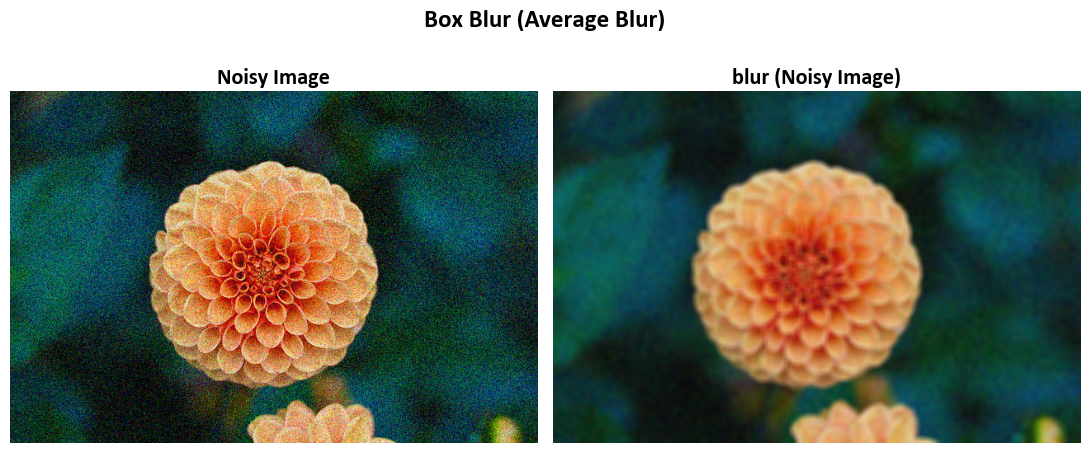

In [4]:
Out = cv2.blur(Img_noise,(8,8))
_ = ImShow(Images = [Img_noise, Out],
           Names = ['Noisy Image','blur (Noisy Image)'],
           title = 'Box Blur (Average Blur)')

<font color='Blue'><b>Example</b></font>:

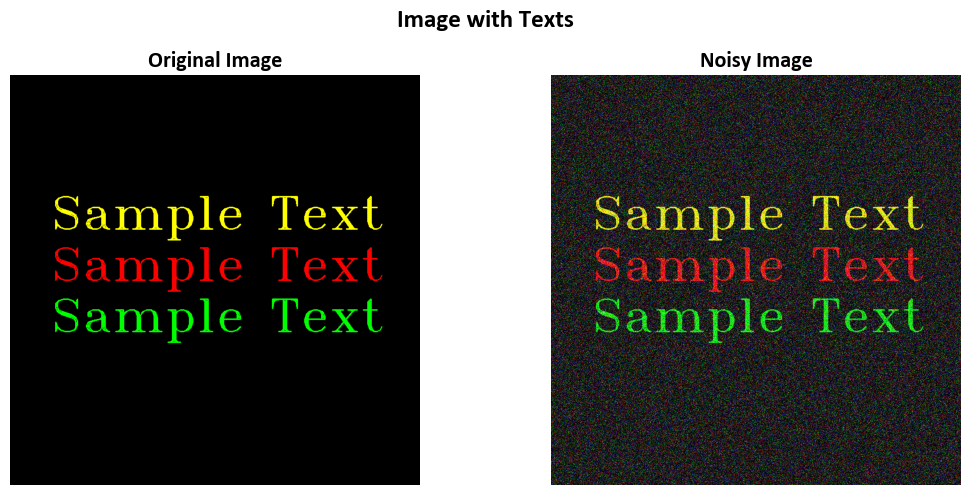

In [5]:
Colors={'White':(255, 255, 255), 'Black':(0, 0, 0), 'Red':(255,0,0),'Green':(0,255,0), 'Blue':(0,0,255),
        'Yellow':(255,255,0), 'Purple':(128,0,128), 'Indigo':(75,0,130),'OrangeRed':(255,69,0)}

Img2 = np.zeros((800, 800, 3), np.uint8)

Img2 = cv2.putText(Img2, text = 'Sample Text', org = (80, 300),
                  fontFace = cv2.FONT_HERSHEY_TRIPLEX, fontScale = 3, color = Colors['Yellow'], thickness = 2)

Img2 = cv2.putText(Img2, text = 'Sample Text', org = (80, 400),
                  fontFace = cv2.FONT_HERSHEY_TRIPLEX, fontScale = 3, color = Colors['Red'], thickness = 2)

Img2 = cv2.putText(Img2, text = 'Sample Text', org = (80, 500),
                  fontFace = cv2.FONT_HERSHEY_TRIPLEX, fontScale = 3, color = Colors['Green'], thickness = 2)

# Generating a noisy image using mu = 0 and sigma = 0.8
mu = 0; sigma = 80
Img2_noise = Img2.copy() - np.random.normal(mu, sigma, size=Img2.shape)
Img2_noise = ImgStd(Img2_noise)

_ = ImShow(Images = [Img2, Img2_noise],
           Names = ['Original Image','Noisy Image'],
           title = 'Image with Texts')

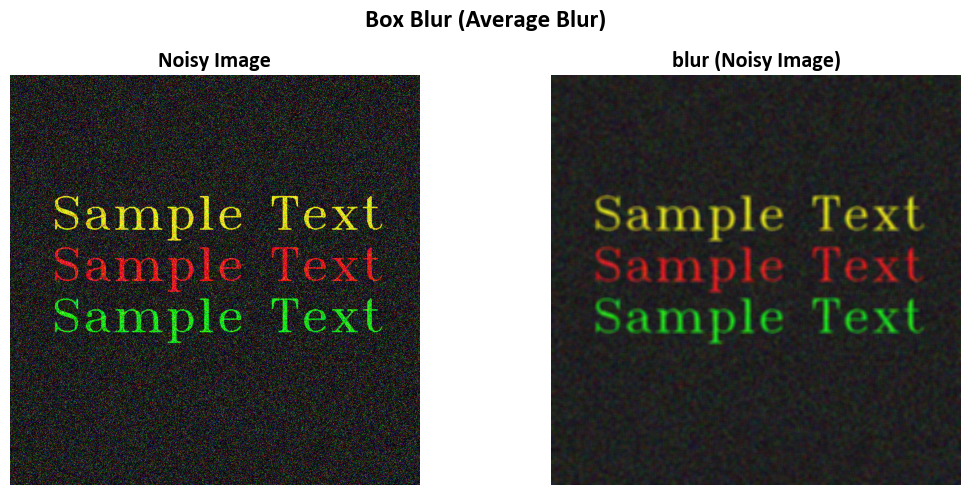

In [6]:
Out = cv2.blur(Img2_noise,(8,8))
_ = ImShow(Images = [Img2_noise, Out],
           Names = ['Noisy Image','blur (Noisy Image)'],
           title = 'Box Blur (Average Blur)')

### Box Filter

The box filter is a blurring technique applied to an image using a specific kernel, which has the form of a matrix filled with ones. The primary purpose of this filter is to smooth the image. The blurring operation is performed by averaging the pixel values within a local neighborhood defined by the size of the kernel {cite:p}`opencv_library, OpenCVDocumentation`.

The mathematical representation of the kernel is as follows:

\begin{equation}
\texttt{K} = \alpha \begin{bmatrix} 1 & 1 & 1 & \cdots & 1 & 1 \\ 1 & 1 & 1 & \cdots & 1 & 1 \\ 
\vdots & \vdots & \vdots &  & \vdots & \vdots  \\ 1 & 1 & 1 & \cdots & 1 & 1 \end{bmatrix}
\end{equation} 
where
\begin{equation}
\alpha = \begin{cases} \frac{1}{\texttt{ksize.width*ksize.height}} & \texttt{when } \texttt{normalize=true} \\1 & \texttt{otherwise}\end{cases}
\end{equation} 

The unnormalized box filter has a specific utility in computing integral characteristics over each pixel neighborhood. For instance, it can be employed to calculate covariance matrices of image derivatives, which are used in various algorithms like dense optical flow algorithms.

However, if the goal is to compute pixel sums over windows of varying sizes, the integral image approach should be utilized.

In summary, the box filter serves as a basic blurring operation using a simple kernel, with the option of normalization. It finds applications in image smoothing and integral-based computations, making it a valuable tool in computer vision tasks.


The Python function `cv2.boxFilter()` is a part of the OpenCV library, which is commonly used for computer vision tasks in Python. This function performs a box filter operation on an input image (source image) and returns the result in the destination image (if provided). Here's a refined explanation of the function signature:

```python
cv2.boxFilter(src, ddepth, ksize[, dst[, anchor[, normalize[, borderType]]]]) → dst
```

- `src`: The source image, on which the box filter operation will be applied.
- `ddepth`: The desired depth of the destination image. It specifies the data type (e.g., `cv2.CV_8U`, `cv2.CV_32F`) of the output image. The result of the filtering will be converted to this depth.
- `ksize`: The size of the box filter kernel. It is a tuple `(ksize_x, ksize_y)` representing the width and height of the kernel. The kernel size must be positive and odd.
- `dst`: (Optional) The destination image where the filtered result will be stored. If not provided, a new image will be created to store the result.
- `anchor`: (Optional) The anchor point within the kernel. It specifies the relative position of the filtered pixel being computed. The default value is `(-1, -1)`, which means the anchor is at the center of the kernel.
- `normalize`: (Optional) A flag that indicates whether the kernel should be normalized or not. If set to `True`, the kernel is normalized to have a sum of 1. If set to `False`, no normalization is applied. The default value is `True`.
- `borderType`: (Optional) The type of border extrapolation. It determines how to handle pixels at the image borders. Common values are `cv2.BORDER_CONSTANT`, `cv2.BORDER_REPLICATE`, etc. The default value is `cv2.BORDER_DEFAULT`.

The function returns the destination image `dst` after applying the box filter operation on the source image with the specified parameters. The box filter is a simple and commonly used filter for smoothing and blurring images. It computes the average value of pixel intensities in a local neighborhood defined by the kernel size.

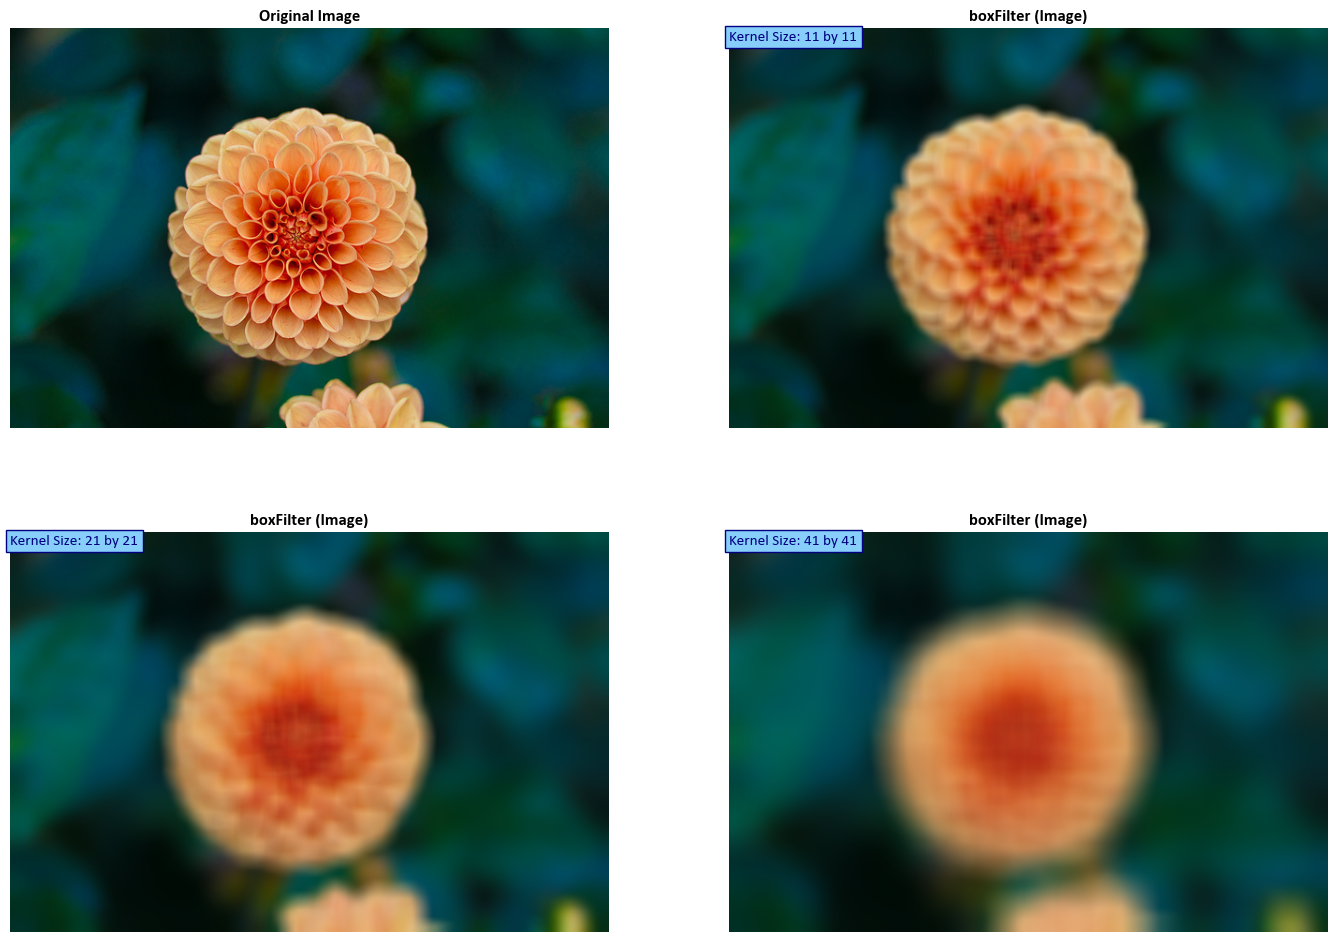

In [7]:
fig, ax = plt.subplots(2, 2 , figsize = (17, 2*6))
ax = ax.ravel()
_ = ax[0].imshow(Img)
_ = ax[0].set_title('Original Image', weight = 'bold', fontsize = 12)

for i in range(1,4):
    k = (2**(i-1))*10+1
    _ = ax[i].imshow(cv2.boxFilter(src = Img, ddepth = -1, ksize = (k, k)))
    _ = ax[i].set_title('boxFilter (Image)', weight = 'bold', fontsize = 12)
    _ = ax[i].text(x = 0, y = int(0.02*Img.shape[1]), s = 'Kernel Size: %i by %i' % (k, k),
                   size=11, color = 'Navy', bbox=dict(boxstyle="square", ec='Navy',fc='LightSkyBlue'))
    
for i in range(len(ax)):
    _ = ax[i].set_aspect(1)
    _ = ax[i].axis('off')

This code creates a visual comparison of the original image and the image obtained by applying the `cv2.boxFilter` operation with different kernel sizes. The results are displayed in a 2x2 grid of subplots, each with appropriate titles and annotations indicating the kernel size used.

### Gaussian Blur

The Gaussian blur is a popular image filtering technique used to reduce noise and achieve smoothness in images. It is based on the Gaussian function, which is a bell-shaped curve that emphasizes the central value while gradually diminishing the influence of neighboring values. The Gaussian blur operation can be described as follows:

In one dimension, the Gaussian function is defined as:
\begin{equation}
G(x) = \frac{1}{\sqrt{2\pi \sigma^2}}e^{-\frac{x^2}{2\sigma^2}}
\end{equation}
where:
- $x$ is the distance from the origin along the horizontal axis,
- $\sigma$ is the standard deviation of the Gaussian distribution, controlling the spread of the curve.

In two dimensions, the Gaussian function is a product of two such Gaussian functions, applied independently in each dimension:
\begin{equation}
G(x, y) = \frac{1}{2\pi \sigma^2}e^{-\frac{x^2 + y^2}{2\sigma^2}}
\end{equation}
where:
- $x$ is the distance from the origin along the horizontal axis,
- $y$ is the distance from the origin along the vertical axis,
- $\sigma$ is the standard deviation, which determines the extent of blurring.

The Gaussian blur is commonly used in image processing and computer vision to achieve a variety of effects, such as noise reduction, image smoothing, and feature-preserving blurring. It is a key tool for enhancing image quality while maintaining important details, making it valuable in various applications. The standard deviation $\sigma$ allows users to control the level of blurring, with larger values leading to more significant smoothing.

The `cv2.GaussianBlur()` function in Python is a part of the OpenCV library, widely used for image processing and computer vision tasks. This function applies Gaussian blurring to an input image (source image) and returns the result in the destination image (if provided) {cite:p}`opencv_library, OpenCVDocumentation`.

**Function Signature:**
```python
cv2.GaussianBlur(src, ksize, sigmaX[, dst[, sigmaY[, borderType]]]) → dst
```

**Parameters:**
- `src`: The source image to which Gaussian blurring will be applied.
- `ksize`: The size of the Gaussian kernel. It is specified as a tuple `(ksize_x, ksize_y)` representing the width and height of the kernel. The kernel size must be positive and odd. A larger kernel results in stronger blurring.
- `sigmaX`: The standard deviation of the Gaussian distribution along the X-axis. It controls the amount of blurring in the horizontal direction. A larger value of `sigmaX` leads to a wider distribution and thus more blurring.
- `dst`: (Optional) The destination image where the blurred result will be stored. If not provided, a new image will be created to store the result.
- `sigmaY`: (Optional) The standard deviation of the Gaussian distribution along the Y-axis. If not specified, it is assumed to be equal to `sigmaX`, resulting in isotropic blurring. If specified, it allows for anisotropic blurring, which can be useful in certain cases.
- `borderType`: (Optional) The type of border extrapolation. It determines how to handle pixels at the image borders. Common values are `cv2.BORDER_CONSTANT`, `cv2.BORDER_REPLICATE`, etc. The default value is `cv2.BORDER_DEFAULT`.

**Output:**
The function returns the destination image `dst` after applying Gaussian blurring to the source image with the specified parameters. Gaussian blurring is a popular method for reducing noise and smoothing an image while preserving important details.

**Note:**
- The Gaussian blur operation is based on a Gaussian filter, which has a bell-shaped curve that emphasizes the central pixel while gradually reducing the influence of neighboring pixels. This results in a smooth and visually pleasing effect.
- The `sigmaX` and `sigmaY` parameters control the spread of the Gaussian distribution along the respective axes.
- The larger the values of `sigmaX` and `sigmaY`, the more significant the blurring effect.
- OpenCV's `cv2.GaussianBlur()` function is commonly used in various image preprocessing and filtering tasks.

For more details, please see [Gaussian Blur](https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html?highlight=cv2.blur#gaussianblur).

<font color='Blue'><b>Example</b></font>:

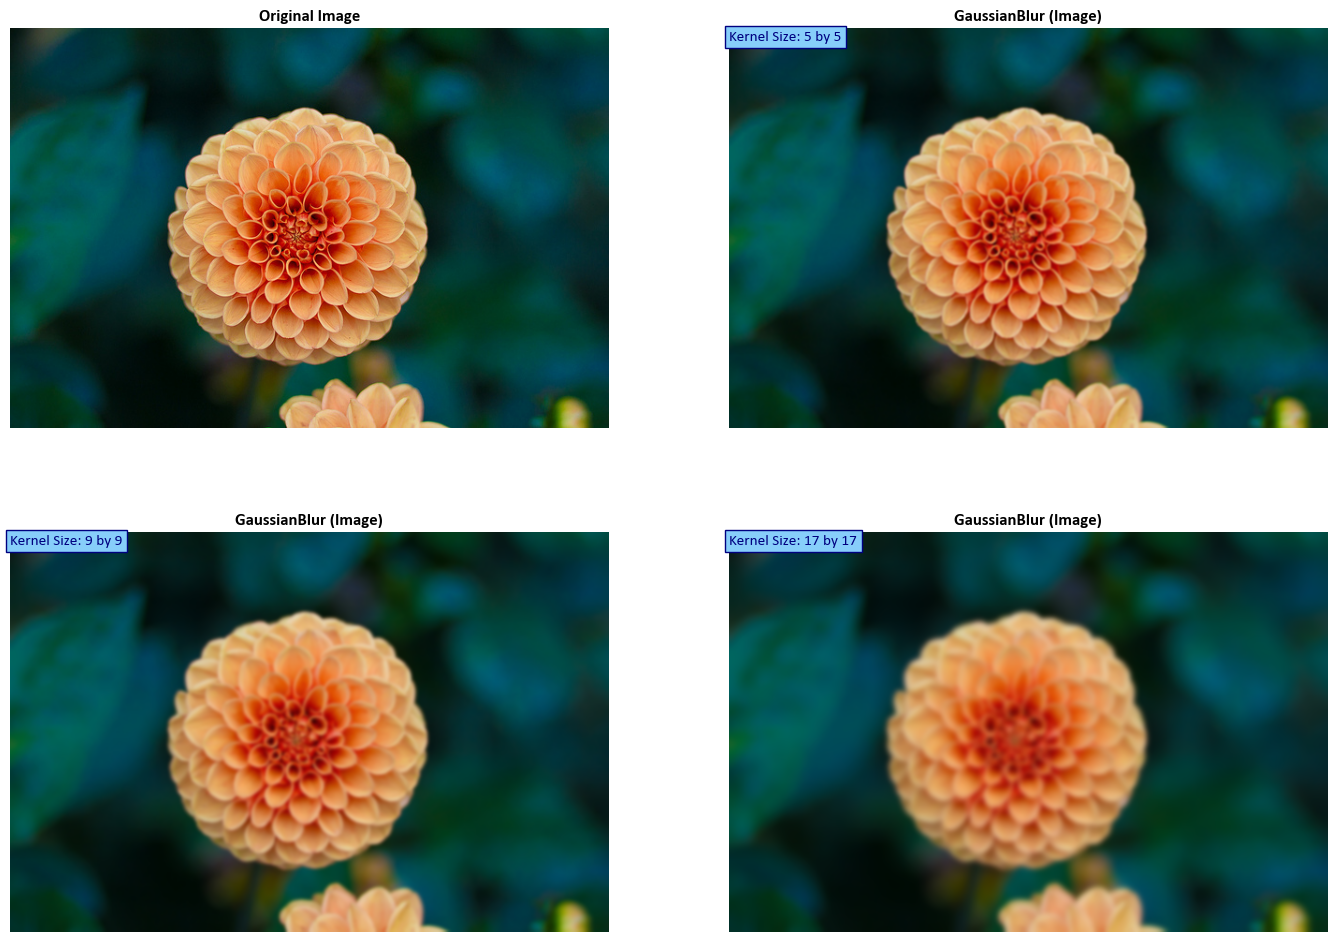

In [8]:
fig, ax = plt.subplots(2, 2 , figsize = (17, 2*6))
ax = ax.ravel()
_ = ax[0].imshow(Img)
_ = ax[0].set_title('Original Image', weight = 'bold', fontsize = 12)

for i in range(1,4):
    k = (2**(i-1))*4+1
    _ = ax[i].imshow(cv2.GaussianBlur(src = Img, ksize = (k, k), sigmaX = 0))
    _ = ax[i].set_title('GaussianBlur (Image)', weight = 'bold', fontsize = 12)
    _ = ax[i].text(x = 0, y = int(0.02*Img.shape[1]), s = 'Kernel Size: %i by %i' % (k, k),
                   size=11, color = 'Navy', bbox=dict(boxstyle="square", ec='Navy',fc='LightSkyBlue'))

for i in range(len(ax)):
    _ = ax[i].set_aspect(1)
    _ = ax[i].axis('off')
del i, k

### Median Blur

The median blur technique is a valuable image filtering method primarily used for noise reduction while preserving the edges and finer details in an image. This technique is especially effective at mitigating the impact of "salt-and-pepper" noise, which are isolated, randomly occurring bright or dark pixels that can distort the appearance of an image. The median blur operation computes the median value within a local neighborhood (specified by a kernel) for each pixel, effectively reducing the influence of noise outliers.

For a more detailed exploration of the median filter, you can refer to the research paper titled "[A Fast Two-Dimensional Median Filtering Algorithm](https://www.uio.no/studier/emner/matnat/ifi/INF2310/v12/undervisningsmateriale/artikler/Huang-etal-median.pdf)" by Thomas S. Huang et al. {cite:p}`huang1979fast`.

In OpenCV, the [Median Blur](https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html?highlight=cv2.blur#medianblur) function, denoted as `cv2.medianBlur()`, provides a convenient way to apply the median blur operation to an image. This function is widely used in computer vision tasks and image processing pipelines to enhance the quality of images by reducing noise while preserving important image structures.

The key advantage of median blur is its ability to effectively handle various types of noise, making it a crucial tool in image preprocessing and denoising applications. It's particularly useful when other blurring methods might smear the edges or fine features of an image, which is not the case with median blur.

In summary, median blur is a powerful technique for noise reduction while retaining image details, and OpenCV's `cv2.medianBlur()` function provides an easy-to-use implementation of this filter for image processing tasks.

The `cv2.medianBlur()` function in Python is a part of the OpenCV library, commonly used for image processing tasks. This function applies median blurring to an input image (source image) and returns the result in the destination image (if provided) {cite:p}`opencv_library, OpenCVDocumentation`.

**Function Signature:**
```python
cv2.medianBlur(src, ksize[, dst]) → dst
```

**Parameters:**
- `src`: The source image to which median blurring will be applied.
- `ksize`: The size of the median filter kernel. It specifies the window over which the median is computed. The kernel size must be a positive odd integer.
- `dst`: (Optional) The destination image where the median-blurred result will be stored. If not provided, a new image will be created to store the result.

**Output:**
The function returns the destination image `dst` after applying median blurring to the source image with the specified parameters. Median blurring is a non-linear image filtering technique that is particularly effective at reducing salt-and-pepper noise in images.

**Note:**
- The median filter works by replacing the value of each pixel in the image with the median value of the pixel intensities within the specified window (kernel) centered around that pixel.
- Median blurring is especially useful for preserving edges and fine details in an image while reducing noise, making it a valuable tool in various image enhancement and denoising applications.
- The choice of `ksize` determines the size of the local neighborhood used for median computation. Larger `ksize` values provide more aggressive noise reduction but may also result in some loss of detail.
- OpenCV's `cv2.medianBlur()` function is a commonly used method for noise reduction and is a key component in image pre-processing pipelines.

<font color='Blue'><b>Example</b></font>:

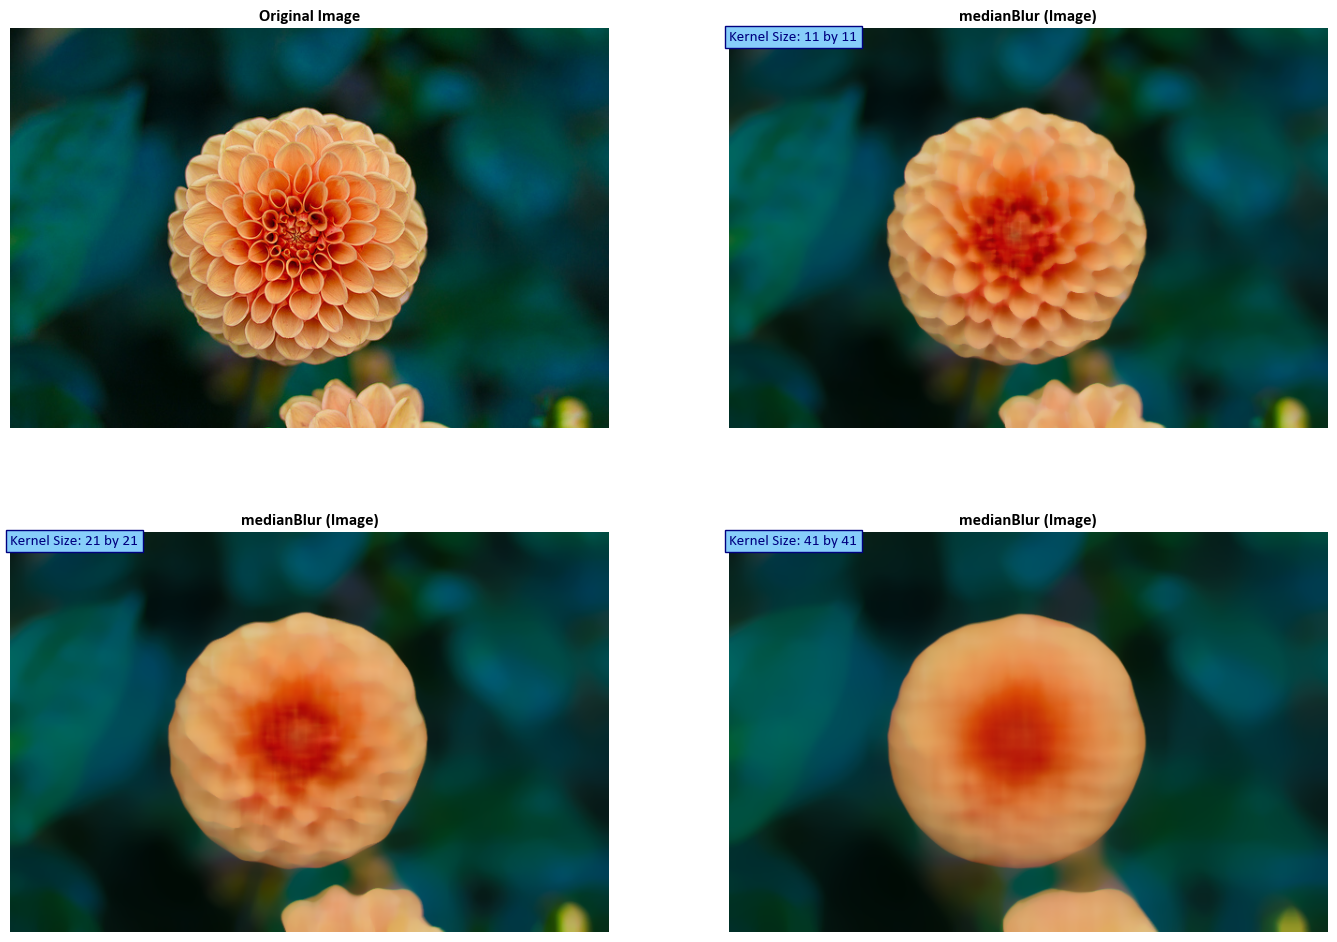

In [9]:
fig, ax = plt.subplots(2, 2 , figsize = (17, 2*6))
ax = ax.ravel()
_ = ax[0].imshow(Img)
_ = ax[0].set_title('Original Image', weight = 'bold', fontsize = 12)

for i in range(1,4):
    k = (2**(i-1))*10+1
    _ = ax[i].imshow(cv2.medianBlur(Img, k, cv2.BORDER_DEFAULT))
    _ = ax[i].set_title('medianBlur (Image)', weight = 'bold', fontsize = 12)
    _ = ax[i].text(x = 0, y = int(0.02*Img.shape[1]), s = 'Kernel Size: %i by %i' % (k, k),
                   size=11, color = 'Navy', bbox=dict(boxstyle="square", ec='Navy',fc='LightSkyBlue'))
for i in range(len(ax)):
    _ = ax[i].set_aspect(1)
    _ = ax[i].axis('off')
del i, k

### Bilateral Filtering

A **bilateral filter** is a sophisticated image smoothing technique that is non-linear, preserves edges, and reduces noise. It operates by combining neighboring pixel values in a way that considers both the differences in pixel intensities (referred to as the "range") and the spatial distances between pixels. This unique combination allows the bilateral filter to effectively smooth an image while retaining important features such as edges.

The mathematical definition of the bilateral filter can be expressed as:

\begin{equation}I^{\text{filtered}}(x) = \frac{1}{W_{p}} \sum_{x_{i}\in \Omega} I(x_{i}) f_{r}(\|I(x_{i})-I(x)\|) g_{s}(\|x_{i}-x\|).\end{equation}

Where:
- $I^{\text{filtered}}$ is the resulting filtered image.
- $I$ is the original input image to be filtered.
- $x$ represents the coordinates of the current pixel being filtered.
- $\Omega$ is the window centered at $x$, and $x_{i}$ refers to another pixel within this window.
- $f_r$ is the range kernel, used for smoothing differences in pixel intensities. This function is often represented as a Gaussian function.
- $g_{s}$ is the spatial (or domain) kernel, used for smoothing differences in pixel coordinates. This function is often represented as a Gaussian function.
- $W_{p}$ is the normalization term, which ensures that the filtered pixel value is properly weighted based on the contributions of neighboring pixels.

For a detailed understanding of the bilateral filter, you can refer to the article [Bilateral Filtering for Gray and Color Images](http://www.dai.ed.ac.uk/CVonline/LOCAL_COPIES/MANDUCHI1/Bilateral_Filtering.html).

Furthermore, for the adaptive bilateral filter, you may be interested in the work by Gavaskar et al. {cite:p}`gavaskar2018fast`.

In summary, bilateral filtering is a powerful method for image smoothing that retains edges while effectively reducing noise. It's a versatile tool with various applications in image processing, and it's particularly useful when preserving fine structures is essential.

The `cv2.bilateralFilter()` function in Python is a part of the OpenCV library, commonly used for image processing tasks. This function applies bilateral filtering to an input image (source image) and returns the result in the destination image (if provided) {cite:p}`opencv_library, OpenCVDocumentation`.

**Function Signature:**
```python
cv2.bilateralFilter(src, d, sigmaColor, sigmaSpace[, dst[, borderType]]) → dst
```

**Parameters:**
- `src`: The source image to which bilateral filtering will be applied.
- `d`: Diameter of each pixel neighborhood used for filtering. It specifies the size of the pixel neighborhood, which affects the amount of blurring. Larger `d` values result in more smoothing across a wider region.
- `sigmaColor`: The standard deviation of the color space. It influences the color similarity between the central pixel and its neighbors. A larger `sigmaColor` value allows for more variation in color within the neighborhood while still preserving edges.
- `sigmaSpace`: The standard deviation of the coordinate space. It influences the spatial proximity between the central pixel and its neighbors. A larger `sigmaSpace` value causes pixels that are farther away from the central pixel to have a reduced influence on the filtering.
- `dst`: (Optional) The destination image where the filtered result will be stored. If not provided, a new image will be created to store the result.
- `borderType`: (Optional) The type of border extrapolation. It determines how to handle pixels at the image borders. Common values are `cv2.BORDER_CONSTANT`, `cv2.BORDER_REPLICATE`, etc. The default value is `cv2.BORDER_DEFAULT`.

**Output:**
The function returns the destination image `dst` after applying bilateral filtering to the source image with the specified parameters. Bilateral filtering is a non-linear filtering technique that preserves edges in the image while reducing noise, making it especially useful for image smoothing without blurring important features.

**Note:**
- The bilateral filter considers both the intensity differences (controlled by `sigmaColor`) and the spatial distances (controlled by `sigmaSpace`) between pixels. This makes it effective at preserving edges and fine details while reducing noise.
- The `d` parameter determines the size of the filtering neighborhood, and both `sigmaColor` and `sigmaSpace` control the extent of blurring. Adjusting these parameters allows users to achieve the desired level of smoothing.
- The `cv2.bilateralFilter()` function is a versatile tool for various image enhancement tasks, denoising, and detail-preserving smoothing in computer vision applications.

See [Bilateral Filtering](https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html?highlight=cv2.blur#bilateralfilter) for more details.

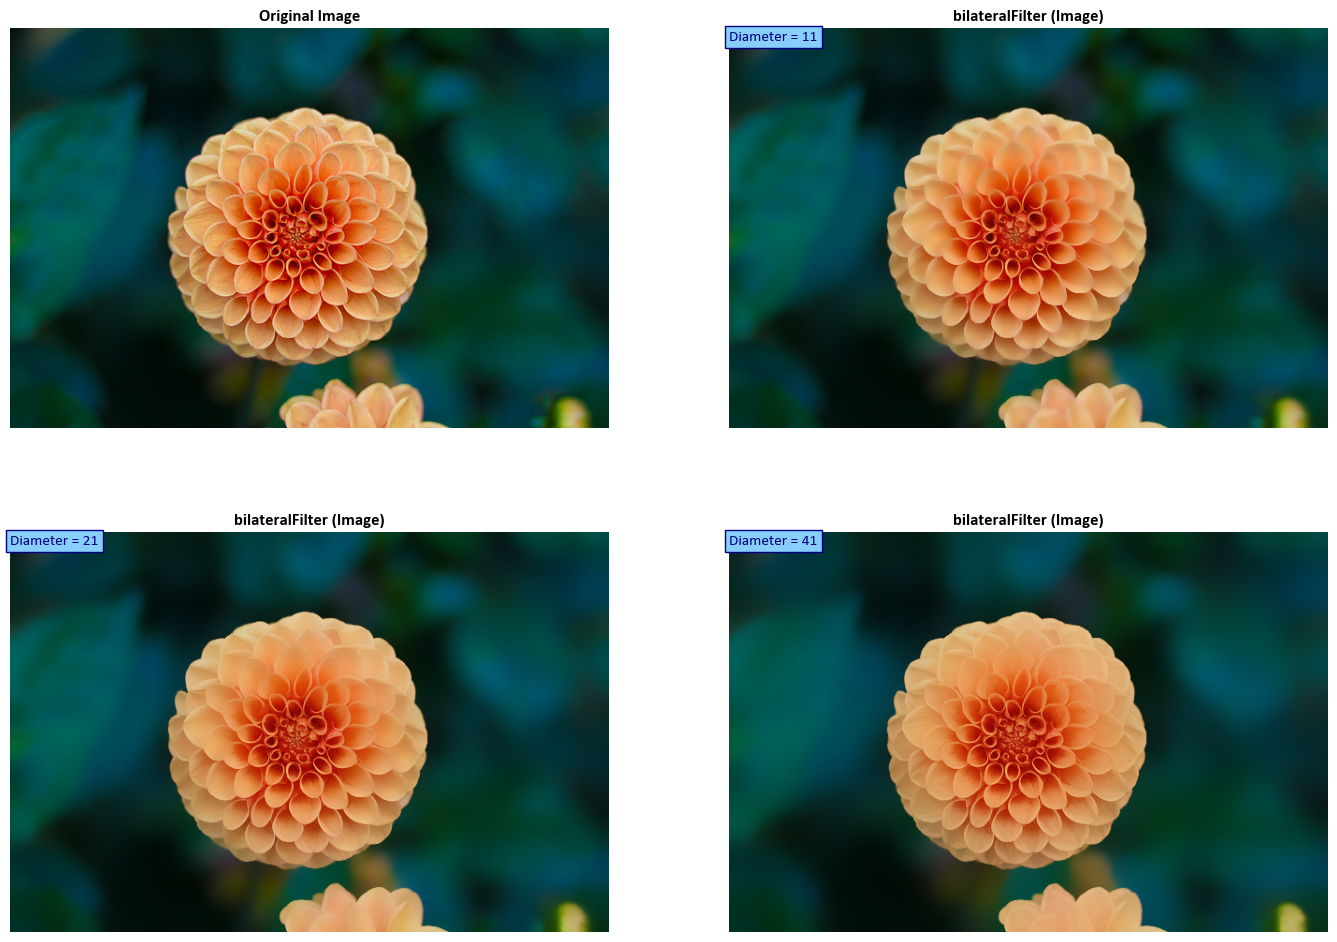

In [10]:
fig, ax = plt.subplots(2, 2 , figsize = (17, 2*6))
ax = ax.ravel()
_ = ax[0].imshow(Img)
_ = ax[0].set_title('Original Image', weight = 'bold', fontsize = 12)

for i in range(1,4):
    k = (2**(i-1))*10+1
    _ = ax[i].imshow(cv2.bilateralFilter(src = Img, d = k, sigmaColor = 75, sigmaSpace = 75))
    _ = ax[i].set_title('bilateralFilter (Image)', weight = 'bold', fontsize = 12)
    _ = ax[i].text(x = 0, y = int(0.02*Img.shape[1]), s = 'Diameter = %i' % k,
                   size=11, color = 'Navy', bbox=dict(boxstyle="square", ec='Navy',fc='LightSkyBlue'))
for i in range(len(ax)):
    _ = ax[i].set_aspect(1)
    _ = ax[i].axis('off')
del i, k